In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [57]:
data=pd.read_csv('/content/mission1_data.csv')
data.head(10)

,Gender,Parental Education Level,Lunch Type,Test Preparation Course,Study Time,Absences,Math Score,Reading Score,Writing Score
0,Male,High School,Standard,NaN,10,7,88,94,72
1,Male,High School,Standard,NaN,1,3,67,80,95
2,Male,Bachelor,Free/Reduced,NaN,1,6,84,100,76
3,Male,Associate,Free/Reduced,Completed,1,1,60,92,64
4,Female,Associate,Free/Reduced,NaN,2,0,72,92,99
5,Male,Master,Standard,NaN,7,2,84,75,61
6,Female,Bachelor,Standard,NaN,4,1,86,64,93
7,Male,Bachelor,Standard,Completed,7,3,98,96,68
8,Female,Some College,Standard,Completed,6,2,66,94,81
9,Female,Some College,Standard,Completed,6,2,66,94,81


In [58]:
data.isna().sum()

,0
Gender,0
Parental Education Level,0
Lunch Type,0
Test Preparation Course,426
Study Time,0
Absences,0
Math Score,0
Reading Score,0
Writing Score,0


In [59]:
data.duplicated().sum()

np.int64(900)

In [60]:
data['Test Preparation Course']=data['Test Preparation Course'].fillna("not Complete")

In [61]:
data['total_score']=data['Math Score']+data['Reading Score']+data['Writing Score']

In [62]:
data

,Gender,Parental Education Level,Lunch Type,Test Preparation Course,Study Time,Absences,Math Score,Reading Score,Writing Score,total_score
0,Male,High School,Standard,not Complete,10,7,88,94,72,254
1,Male,High School,Standard,not Complete,1,3,67,80,95,242
2,Male,Bachelor,Free/Reduced,not Complete,1,6,84,100,76,260
3,Male,Associate,Free/Reduced,Completed,1,1,60,92,64,216
4,Female,Associate,Free/Reduced,not Complete,2,0,72,92,99,263
...,...,...,...,...,...,...,...,...,...,...
995,Male,Master,Free/Reduced,Completed,6,5,91,95,71,257
996,Male,Master,Free/Reduced,Completed,10,0,88,85,86,259
997,Male,Master,Free/Reduced,Completed,1,6,89,90,96,275
998,Female,Master,Standard,Completed,10,8,84,99,85,268


In [63]:
encoded=['Gender',	'Parental Education Level'	,'Lunch Type'	,'Test Preparation Course']
le={}
for col in encoded:
  le[col]=LabelEncoder()
  data[col] = le[col].fit_transform(data[col])

In [64]:
sc=StandardScaler()
scall=['Study Time'	,'Absences'	,'Math Score',	'Reading Score'	,'Writing Score']
data[scall]=sc.fit_transform(data[scall])

In [65]:
data.head()

,Gender,Parental Education Level,Lunch Type,Test Preparation Course,Study Time,Absences,Math Score,Reading Score,Writing Score,total_score
0,1,2,1,1,1.528624,0.763990,0.603102,1.315056,-0.696759,254
1,1,2,1,1,-1.425556,-0.524901,-1.246904,0.120481,1.306173,242
2,1,1,0,1,-1.425556,0.441767,0.250720,1.827017,-0.348423,260
3,1,0,0,0,-1.425556,-1.169346,-1.863573,1.144403,-1.393432,216
4,0,0,0,1,-1.097314,-1.491569,-0.806427,1.144403,1.654510,263


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    1000 non-null   int64  
 1   Parental Education Level  1000 non-null   int64  
 2   Lunch Type                1000 non-null   int64  
 3   Test Preparation Course   1000 non-null   int64  
 4   Study Time                1000 non-null   float64
 5   Absences                  1000 non-null   float64
 6   Math Score                1000 non-null   float64
 7   Reading Score             1000 non-null   float64
 8   Writing Score             1000 non-null   float64
 9   total_score               1000 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 78.3 KB


In [67]:
data.describe()

,Gender,Parental Education Level,Lunch Type,Test Preparation Course,Study Time,Absences,Math Score,Reading Score,Writing Score,total_score
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,0.568000,1.932000,0.492000,0.426000,3.197442e-17,1.367795e-16,3.250733e-16,5.186962e-16,-4.156675e-16,239.743000
std,0.495602,1.327078,0.500186,0.494741,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,20.136495
min,0.000000,0.000000,0.000000,0.000000,-1.425556e+00,-1.491569e+00,-1.863573e+00,-1.586054e+00,-1.741768e+00,193.000000
25%,0.000000,1.000000,0.000000,0.000000,-7.690715e-01,-8.471236e-01,-8.064266e-01,-8.181130e-01,-8.709274e-01,222.000000
50%,1.000000,2.000000,0.000000,0.000000,-1.125871e-01,-2.026781e-01,7.452883e-02,-1.354989e-01,8.699695e-02,242.000000
75%,1.000000,3.000000,1.000000,1.000000,8.721395e-01,7.639902e-01,7.792932e-01,8.884222e-01,8.707532e-01,256.000000
max,1.000000,4.000000,1.000000,1.000000,1.528624e+00,1.730658e+00,1.660249e+00,1.827017e+00,1.741594e+00,284.000000


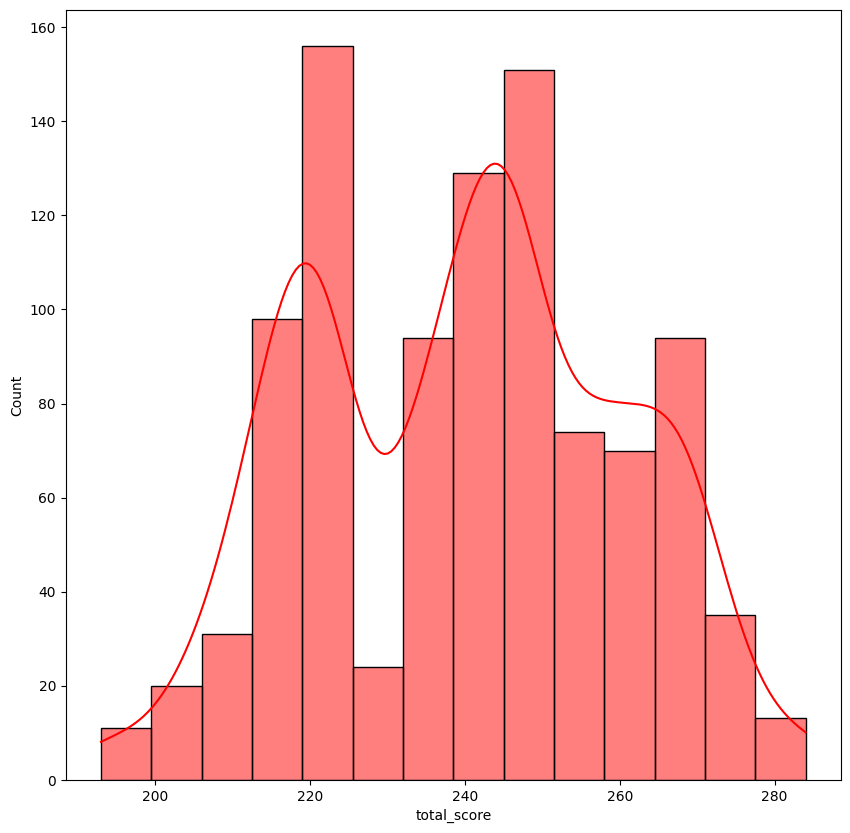

In [68]:
plt.figure(figsize=(10,10))
sns.histplot(data['total_score'],color="red",kde=True)
plt.title=("distrbation of Total_score")
plt.xlabel=("score")
plt.ylabel=('count')

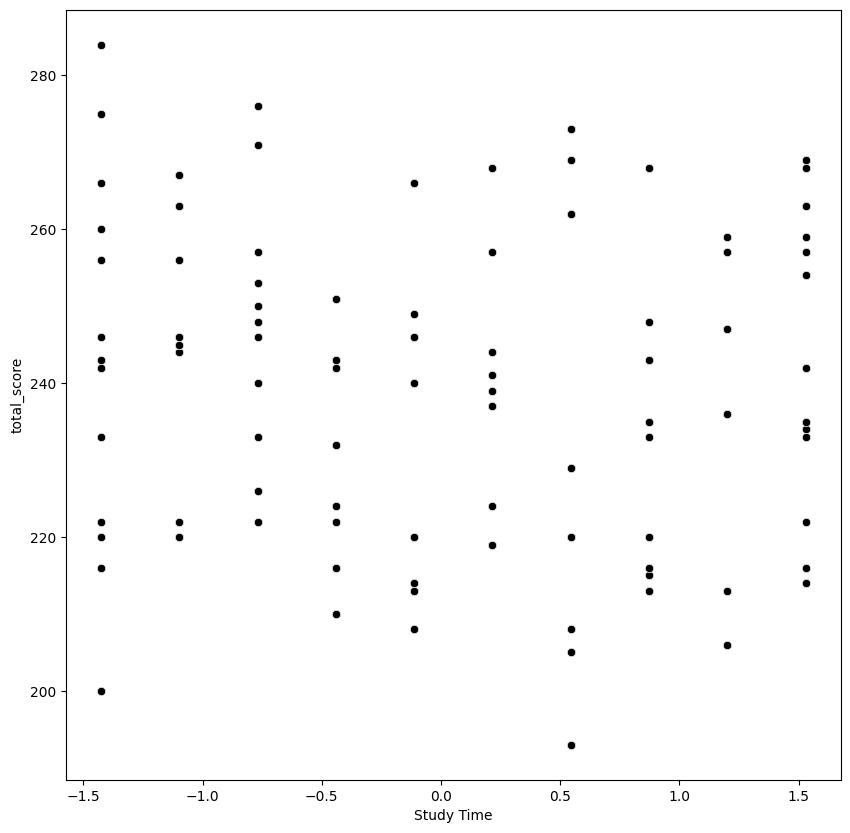

In [69]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['Study Time'],y=data['total_score'],color="black")
plt.title=("relation between study time and score")
plt.xlabel=("study time")
plt.ylabel=('score')

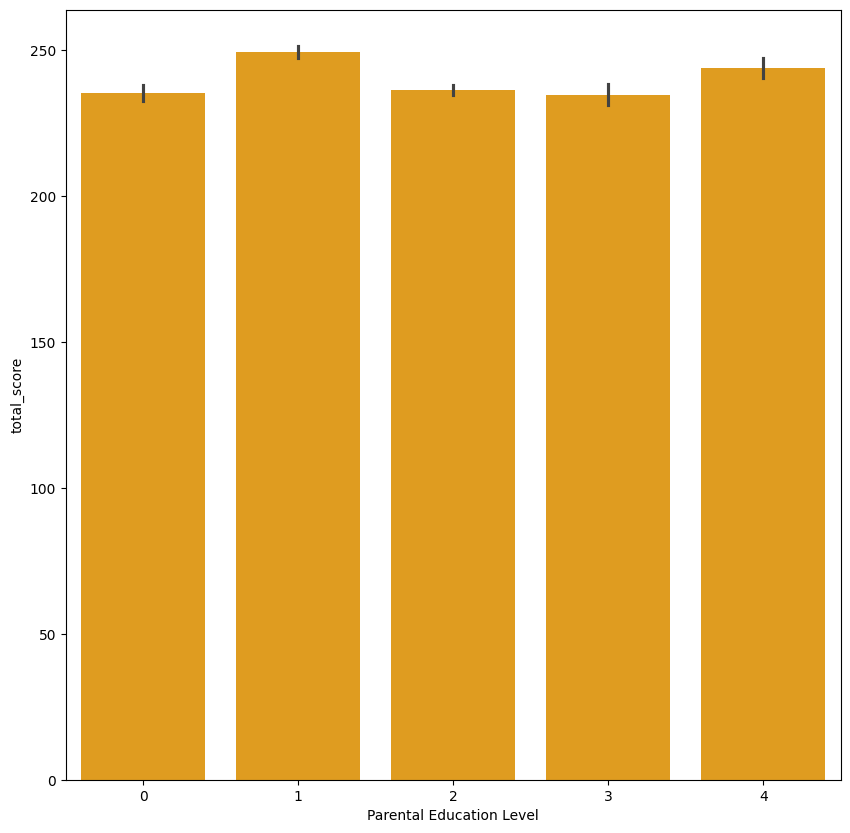

In [70]:
plt.figure(figsize=(10,10))
sns.barplot(x=data['Parental Education Level'],y=data['total_score'],color="orange")
plt.title=("impact Parental Education Level on total_score")
plt.xlabel=("Parental Education Level time")
plt.ylabel=('score')

In [71]:

x=data.drop('total_score',axis=1)
y=data['total_score']

x_train,x_test,y_trian,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [72]:
lr=LinearRegression()
de=DecisionTreeRegressor()
ra=RandomForestRegressor()

In [73]:
lr.fit(x_train,y_trian)

LinearRegression()

In [74]:
de.fit(x_train,y_trian)

DecisionTreeRegressor()

In [75]:
ra.fit(x_train,y_trian)

RandomForestRegressor()

In [76]:
y_pred_lr=lr.predict(x_test)
y_pred_de=de.predict(x_test)
y_pred_ra=ra.predict(x_test)




In [77]:
print("MSE",mean_squared_error(y_test,y_pred_lr))
print("MAE",mean_absolute_error(y_test,y_pred_lr))
print("r2_score",r2_score(y_test,y_pred_lr))

MSE 6.058451752097371e-28
MAE 1.5063505998114125e-14
r2_score 1.0


In [78]:
print("MSE",mean_squared_error(y_test,y_pred_de))
print("MAE",mean_absolute_error(y_test,y_pred_de))
print("r2_score",r2_score(y_test,y_pred_de))

MSE 0.0
MAE 0.0
r2_score 1.0


In [79]:
print("MSE",mean_squared_error(y_test,y_pred_ra))
print("MAE",mean_absolute_error(y_test,y_pred_ra))
print("r2_score",r2_score(y_test,y_pred_ra))

MSE 0.07274949999999997
MAE 0.05145000000000095
r2_score 0.9998052804034993


<Axes: xlabel='total_score'>

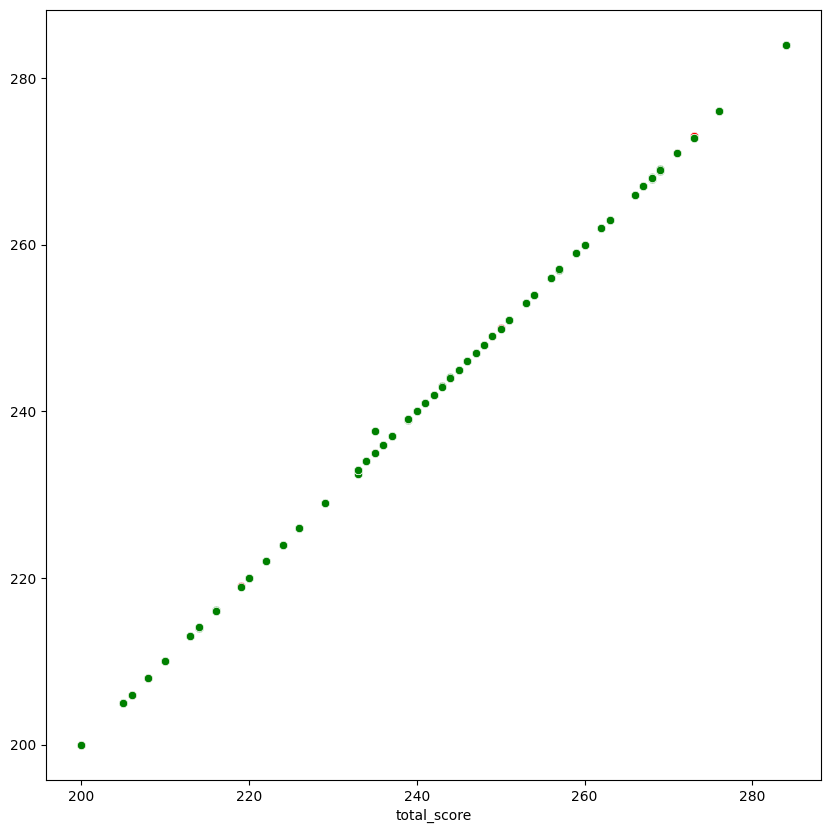

In [80]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=y_pred_lr,color="black")
sns.scatterplot(x=y_test,y=y_pred_de,color="red")
sns.scatterplot(x=y_test,y=y_pred_ra,color="green")




In [81]:
grid_params={
    'max_depth':[10,20,30,40,50,60],
    'max_leaf_nodes':[50,100,200,400,500]

}
grid_model=GridSearchCV(de,grid_params,cv=5)
grid_model.fit(x_train,y_trian)
print("the best paramter",grid_model.best_params_)
print("the best score",grid_model.best_score_)

the best paramter {'max_depth': 20, 'max_leaf_nodes': 100}
the best score 0.9998923386621957


In [82]:
y_pred_grid=grid_model.best_estimator_.predict(x_test)

In [83]:
print("MSE",mean_squared_error(y_test,y_pred_grid))
print("MAE",mean_absolute_error(y_test,y_pred_grid))
print("r2_score",r2_score(y_test,y_pred_grid))

MSE 0.0
MAE 0.0
r2_score 1.0


In [84]:
random_params={
    'max_depth':[10,20,30,40,50,60],
    'n_estimators':[50,100,200,400,500]

}
random_model=RandomizedSearchCV(ra,random_params,cv=5)
random_model.fit(x_train,y_trian)
print("the best paramter",random_model.best_params_)
print("the best score",random_model.best_score_)

the best paramter {'n_estimators': 400, 'max_depth': 40}
the best score 0.9995955136076116


In [85]:
y_pred_random=random_model.best_estimator_.predict(x_test)

In [86]:
print("MSE",mean_squared_error(y_test,y_pred_random))
print("MAE",mean_absolute_error(y_test,y_pred_random))
print("r2_score",r2_score(y_test,y_pred_random))

MSE 0.08018203124999967
MAE 0.045612499999999584
r2_score 0.9997853866655907


In [87]:
pip install gradio

In [88]:
import gradio as gr

In [89]:
data.columns

Index(['Gender', 'Parental Education Level', 'Lunch Type',
       'Test Preparation Course', 'Study Time', 'Absences', 'Math Score',
       'Reading Score', 'Writing Score', 'total_score'],
      dtype='object')

In [91]:
def student(Gender,Parental,Lunch ,Course,Time,Absences,Math,Reading,Writing ):
  try:
    input_data=pd.DataFrame({
        'Gender':[Gender],
        'Parental Education Level':[Parental],
        'Lunch Type':[Lunch ],
        'Test Preparation Course':[Course],
        'Study Time':[Time],
        'Absences':[Absences],
        'Math Score':[Math],
        'Reading Score':[Reading],
        'Writing Score':[Writing]
})
    for col in encoded:
      input_data[col]=le[col].transform(input_data[col])
    input_data[scall]=sc.transform(input_data[scall])
    predication=ra.predict(input_data)
    return f"student preformance: {predication[0]:,.2f}"
  except Exception as e:
    return str(e)
gr.Interface(
    fn=student,
    inputs=[
        gr.Dropdown(['Male','Female'],label='Gender'),
        gr.Dropdown(['Associate','Bachelor','High School','Master','Some College'],label='Parental Education Level'),
        gr.Dropdown(['Free/Reduced','Standard'],label='Lunch Type'),
        gr.Dropdown(['Completed','not Complete'],label='Test Preparation Course'),
        gr.Number(label='Study Time'),
        gr.Number(label='Absences'),
        gr.Number(label='Math Score'),
        gr.Number(label='Reading Score'),
        gr.Number(label='Writing Score')

],
    outputs=gr.TextArea(label="predication"),
    title="student_preformance"
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5084f46f278b713e93.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
